In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
ddata = pd.read_csv('us_contagious_diseases.csv')
hepdata = ddata[ddata['disease'] == "Hepatitis A"]
hepdata_clean = hepdata.dropna()
hepdata_clean.head()

,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966,50,321,3345787.0
1,Hepatitis A,Alabama,1967,49,291,3364130.0
2,Hepatitis A,Alabama,1968,52,314,3386068.0
3,Hepatitis A,Alabama,1969,49,380,3412450.0
4,Hepatitis A,Alabama,1970,51,413,3444165.0


In [4]:
#Shalanda's rate function
for index, row in hepdata_clean.iterrows():
    if row['weeks_reporting'] == 0:
        hepdata_clean.loc[index,'rate'] = 0
    else:
        hepdata_clean.loc[index,'rate'] = (row['count']/row['population'])*10000 * (52/ row['weeks_reporting'])

hepdata_clean.head()

,disease,state,year,weeks_reporting,count,population,rate
0,Hepatitis A,Alabama,1966,50,321,3345787.0,0.997792
1,Hepatitis A,Alabama,1967,49,291,3364130.0,0.917968
2,Hepatitis A,Alabama,1968,52,314,3386068.0,0.927329
3,Hepatitis A,Alabama,1969,49,380,3412450.0,1.181747
4,Hepatitis A,Alabama,1970,51,413,3444165.0,1.222642


In [5]:
yeararray = hepdata_clean['year'].unique()
print(yeararray)

[1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011]


In [6]:
#Nested for loop in a for loop to average the infection rate from each state by year (making it a US rate) 

yearmean = []
for i in yeararray:
    rateholder = []
    for index, row in hepdata_clean.iterrows():
      if row['year'] == i:
        rateholder.append(row['rate'])
    yearmean.append([i, statistics.mean(rateholder)])

print(yearmean)

[[1966, 1.8643446924232092], [1967, 2.039541322767282], [1968, 2.31718774152369], [1969, 2.5191122456273405], [1970, 2.998859478223689], [1971, 3.2462815391359157], [1972, 2.936779520474307], [1973, 2.681938237622732], [1974, 2.379445221242545], [1975, 2.133988084202586], [1976, 4.046289512178224], [1977, 1.9076943962198316], [1978, 1.7313810619447967], [1979, 1.5904285754014478], [1980, 1.399897581777926], [1981, 1.2183138062970595], [1982, 1.0769307714684664], [1983, 1.086860457867612], [1984, 1.0904821268217442], [1985, 1.2071398797941502], [1986, 1.1308925957574245], [1987, 1.284689318871805], [1988, 1.3429644288405012], [1989, 1.6990078956302985], [1990, 1.374357001618707], [1991, 1.234952671854224], [1992, 0.9885754909016881], [1993, 1.0535325152997996], [1994, 1.1140574302548556], [1995, 1.232464574574412], [1996, 1.1984392148225602], [1997, 0.975226703412869], [1998, 0.7149058212681796], [1999, 0.47653610099075333], [2000, 0.363582653093172], [2001, 0.350144085080325], [2002, 0

In [7]:
yearmeannp = np.array(yearmean)
yearmeanX = yearmeannp[:, 0].reshape((-1, 1))
yearmeanY = yearmeannp[:, 1]
print(yearmeanX)

[[1966.]
 [1967.]
 [1968.]
 [1969.]
 [1970.]
 [1971.]
 [1972.]
 [1973.]
 [1974.]
 [1975.]
 [1976.]
 [1977.]
 [1978.]
 [1979.]
 [1980.]
 [1981.]
 [1982.]
 [1983.]
 [1984.]
 [1985.]
 [1986.]
 [1987.]
 [1988.]
 [1989.]
 [1990.]
 [1991.]
 [1992.]
 [1993.]
 [1994.]
 [1995.]
 [1996.]
 [1997.]
 [1998.]
 [1999.]
 [2000.]
 [2001.]
 [2002.]
 [2003.]
 [2004.]
 [2005.]
 [2006.]
 [2007.]
 [2008.]
 [2009.]
 [2010.]
 [2011.]]


In [8]:
model = LinearRegression()
model.fit(yearmeanX, yearmeanY)

LinearRegression()

In [9]:
r_sq = model.score(yearmeanX, yearmeanY)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7817594967994173


In [10]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(yearmeanX, yearmeanY, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [11]:
y_guess = regressor.predict(X_test)

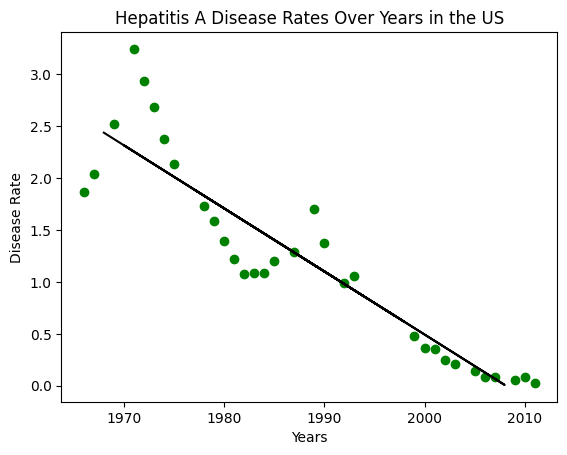

In [12]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_test, y_guess,color='k')
plt.xlabel("Years")
plt.ylabel("Disease Rate")
plt.title("Hepatitis A Disease Rates Over Years in the US")
plt.show()

In [40]:
#Degree of relationship
r_sq = regressor.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.06309775954155616


In [14]:
#mean squared error on testing data
testmeansqerr = mean_squared_error(y_true = y_test, y_pred = regressor.predict(X_test))
print(testmeansqerr)

0.3953465754863373


In [15]:
#mean squared error on training data (naturally training data would have less error compared to the MSE on the testing data bc we trained the model off of it)
trainmeansqerr = mean_squared_error(y_true = y_train, y_pred = regressor.predict(X_train))
print(trainmeansqerr)

0.1295322421189203


(array([4., 4., 4., 1., 0., 0., 0., 0., 0., 1.]),
 array([-0.21421686,  0.0165478 ,  0.24731246,  0.47807712,  0.70884178,
         0.93960644,  1.1703711 ,  1.40113576,  1.63190042,  1.86266508,
         2.09342974]),
 <BarContainer object of 10 artists>)

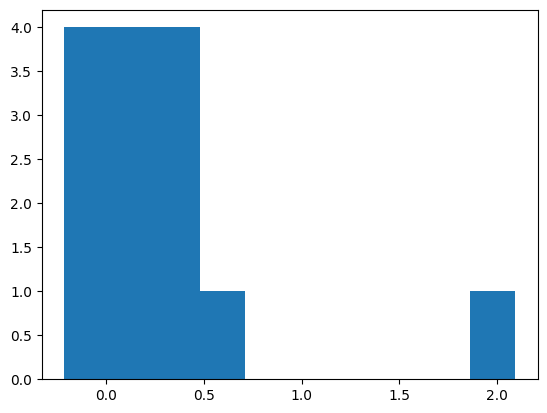

In [17]:
plt.hist(y_test - y_guess)

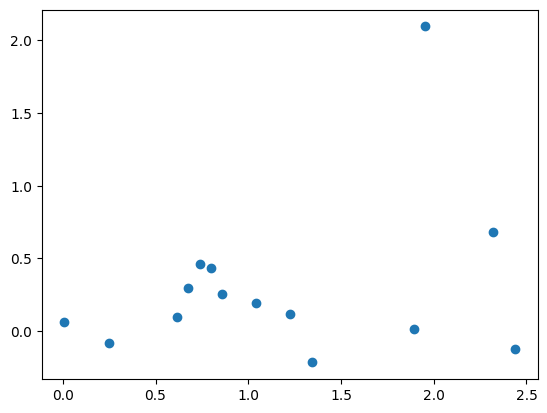

In [18]:
plt.scatter(y_guess, y_test - y_guess)

In [25]:
rateyear = hepdata_clean[['year', 'rate']]
rateyear.head()

,year,rate
0,1966,0.997792
1,1967,0.917968
2,1968,0.927329
3,1969,1.181747
4,1970,1.222642


In [26]:
rateyear.count()

year    2346
rate    2346
dtype: int64

In [27]:
xvalue = np.array(rateyear['year']).reshape((-1, 1))
yvalue = np.array(rateyear['rate'])

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xvalue, yvalue, test_size=0.3, random_state=0)
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)
LinearRegression()

LinearRegression()

In [31]:
y_guess1 = regressor1.predict(X_test1)

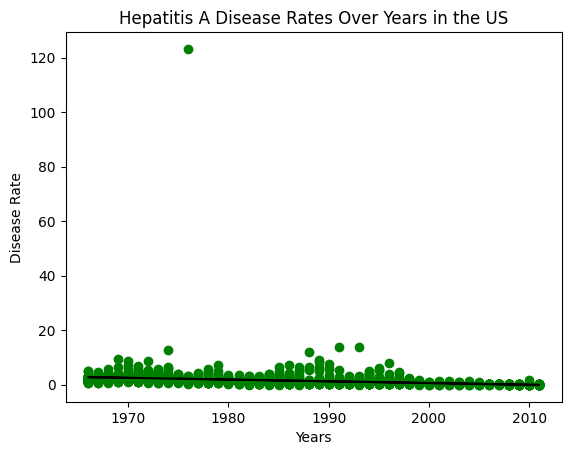

In [32]:
plt.scatter(X_train1, y_train,color='g')
plt.plot(X_test1, y_guess1,color='k')
plt.xlabel("Years")
plt.ylabel("Disease Rate")
plt.title("Hepatitis A Disease Rates Over Years in the US")
plt.show()

In [33]:
filtered_rateyear = rateyear.query('rate < 100')
filtered_rateyear.count()

year    2345
rate    2345
dtype: int64

In [34]:
xvalue = np.array(filtered_rateyear['year']).reshape((-1, 1))
yvalue = np.array(filtered_rateyear['rate'])

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xvalue, yvalue, test_size=0.3, random_state=0)
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)


LinearRegression()

In [47]:
y_guess1 = regressor1.predict(X_test1)

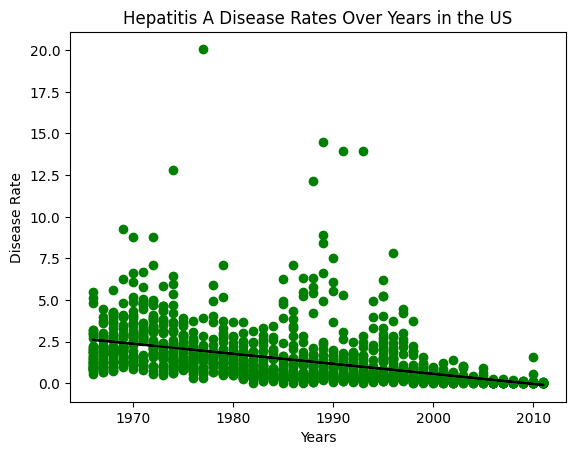

In [48]:
plt.scatter(X_train1, y_train1,color='g')
plt.plot(X_test1, y_guess1,color='k')
plt.xlabel("Years")
plt.ylabel("Disease Rate")
plt.title("Hepatitis A Disease Rates Over Years in the US")
plt.show()

In [49]:
#Degree of relationship
r_sq = regressor1.score(X_train1, y_train1)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.25403214197775736


In [50]:
#mean squared error on testing data
testmeansqerr = mean_squared_error(y_true = y_test1, y_pred = regressor1.predict(X_test1))
print(testmeansqerr)

1.4471338174967123


In [51]:
#mean squared error on training data 
trainmeansqerr = mean_squared_error(y_true = y_train1, y_pred = regressor1.predict(X_train1))
print(trainmeansqerr)

1.9143330727092542


(array([331., 329.,  33.,   6.,   1.,   1.,   0.,   1.,   1.,   1.]),
 array([-2.29509907, -0.26173205,  1.77163497,  3.80500199,  5.838369  ,
         7.87173602,  9.90510304, 11.93847005, 13.97183707, 16.00520409,
        18.0385711 ]),
 <BarContainer object of 10 artists>)

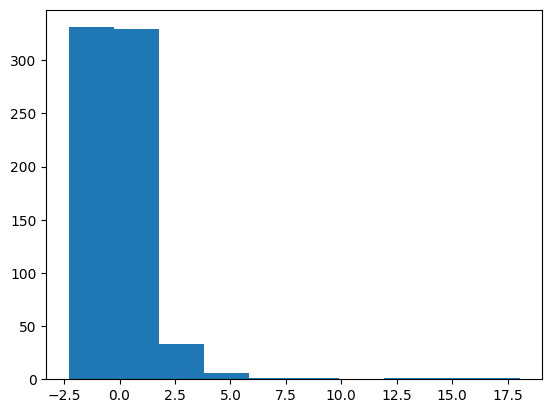

In [44]:
plt.hist(y_test - y_guess)

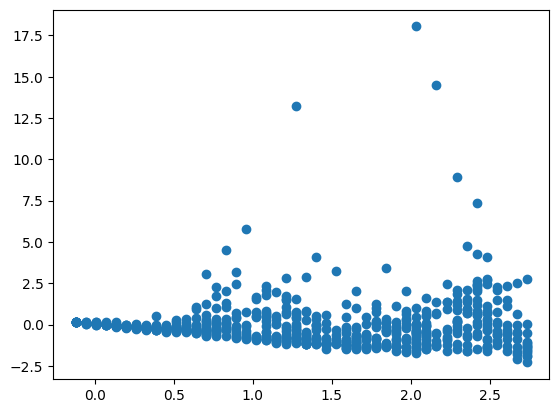

In [45]:
plt.scatter(y_guess, y_test - y_guess)